In [ ]:
import qiskit
import numpy as np, matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit

In [2]:
num_qubits = 4
num_layers = 3
phis = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*10)

In [3]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [11:00<00:00,  3.30s/it]


In [4]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [12:33<00:00,  3.77s/it]


In [5]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_qng = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [12:20<00:00,  3.70s/it]


In [6]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_qng_adam = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng_adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [12:48<00:00,  3.84s/it]


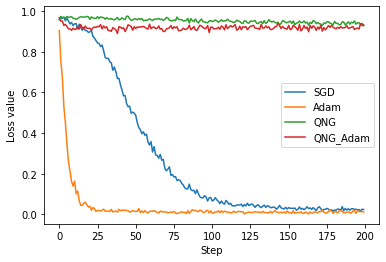

In [7]:
plt.show()
plt.plot(loss_values_sgd, label="SGD")
plt.plot(loss_values_adam, label="Adam")
plt.plot(loss_values_qng, label="QNG")
plt.plot(loss_values_qng_adam, label="qng_adam")
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.legend()
plt.show()